##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [53]:
'''
This notebooks intends to anaylze trends within new voter registration data from a 4 month period in the years 2016 and 2020. It will provide clear
visualizations and answers to the following questions:

q1: states total voter registration compared by year
q2: what is California states voter registration over the 4 month time interval in 2016 and 2020
'''

'\nThis notebooks intends to anaylze trends within new voter registration data from a 4 month period in the years 2016 and 2020. It will provide clear\nvisualizations and answers to the following questions:\n\nq1: states total voter registration compared by year\nq2: what is California states voter registration over the 4 month time interval in 2016 and 2020\n'

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [6]:
voters.head(5)

'''
the column names are features that are included in the data. in this case they are the state, year, month, and number of new
registered voters in the entry
'''

'\nthe column names are features that are included in the data. in this case they are the state, year, month, and number of new \nregistered voters in the entry\n'

Check for any missing data data. (1 point)

In [9]:
voters.isnull().values.any()

False

Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [3]:
voters = voters.rename(columns = {'Jurisdiction':'NAME','New registered voters':'registered_voters' })

Explain any potential limitations to your data (2 points)

In [4]:
'''
the data does not show the percent change in the state total eligable voting population, which is the metric that would reflect the true voter
particpation. This will lead to states with large population sizes dominating statistics with a lack of normalization
'''

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [7]:
highest = voters.sort_values(by='registered_voters', ascending=False)
highest.iloc[0]


,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


What is the average voter registration? (1 points)

In [8]:
voters.registered_voters.mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [9]:
mean = voters.registered_voters.mean()
high_voters = voters.loc[voters.registered_voters >= mean]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


How many times did each state go above the national average for new voter registration? (2 points)



In [11]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [21]:
df=voters.groupby('NAME').registered_voters.mean()
df = df.sort_values(ascending=False)
df.head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

<ipython-input-27-9b81fcb83daa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='registered_voters', y='NAME', data=state, palette='flare')


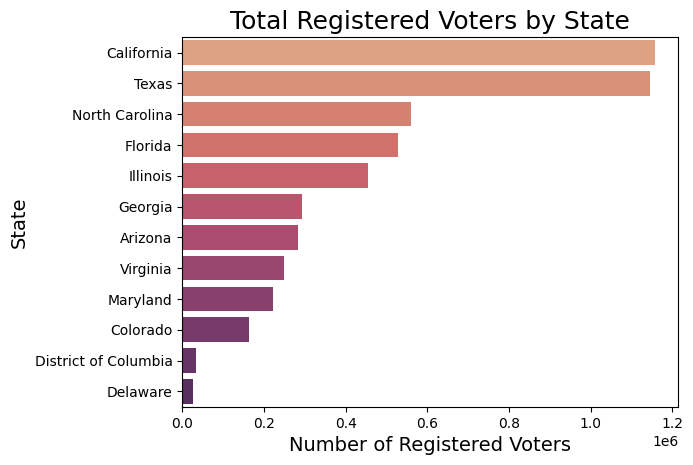

In [27]:
state = voters.groupby('NAME')['registered_voters'].sum().reset_index()
state = state.sort_values(by='registered_voters', ascending=False)

sns.barplot(x='registered_voters', y='NAME', data=state, palette='flare')
plt.title('Total Registered Voters by State', fontsize=18)
plt.xlabel('Number of Registered Voters', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.show()

In [28]:
'''
as predicted the states with the larger voter registerations are the ones with a larger population
'''

'\nas predicted the states with the larger voter registerations are the ones with a larger population\n'

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

Text(0, 0.5, 'Total Registered Voters')

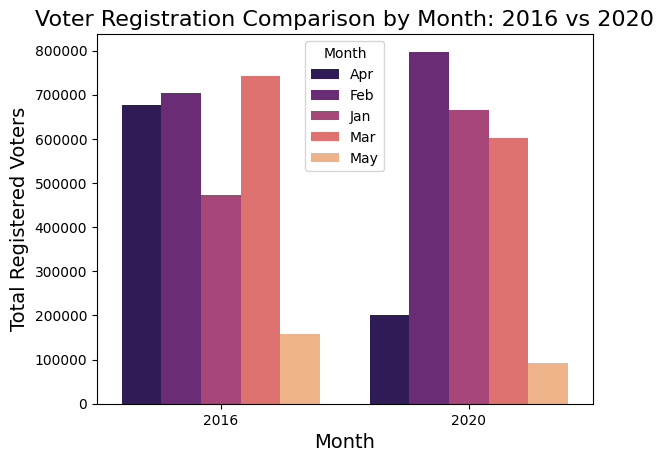

In [33]:
month = voters.groupby(['Year', 'Month'])['registered_voters'].sum().reset_index()

sns.barplot(x='Year', y='registered_voters', hue='Month', data=month, palette='magma')
plt.title('Voter Registration Comparison by Month: 2016 vs 2020', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Registered Voters', fontsize=14)

In [ ]:
'''
2020 saw a clear drop due to covid in april and may, but it is interesting to see may of 2016 have similar registration numbers as he start of
covid
'''

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Arizona'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Colorado'),
  Text(3, 0, 'Delaware'),
  Text(4, 0, 'District of Columbia'),
  Text(5, 0, 'Florida'),
  Text(6, 0, 'Georgia'),
  Text(7, 0, 'Illinois'),
  Text(8, 0, 'Maryland'),
  Text(9, 0, 'North Carolina'),
  Text(10, 0, 'Texas'),
  Text(11, 0, 'Virginia')])

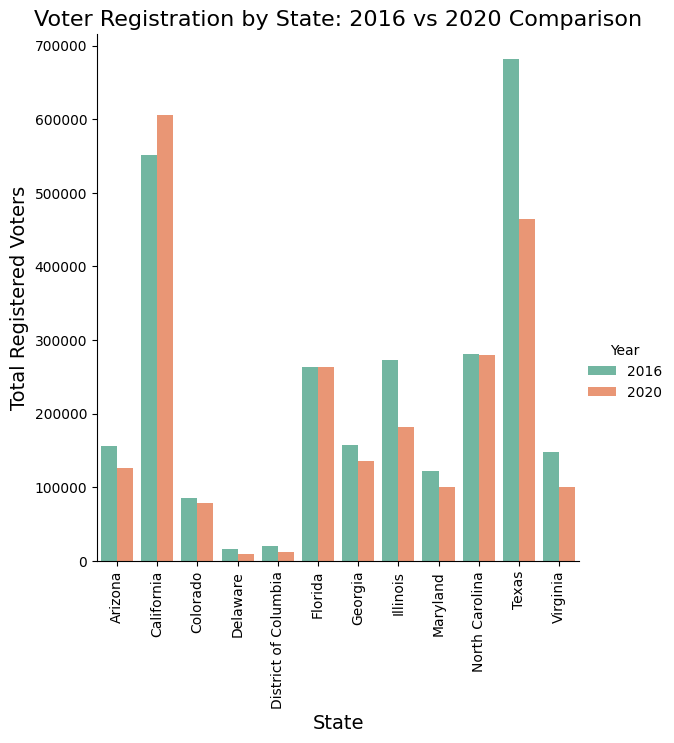

In [39]:
year = voters.groupby(['NAME', 'Year'])['registered_voters'].sum().reset_index()

sns.catplot(x='NAME', y='registered_voters', hue='Year', data=year, kind='bar', palette='Set2', height=6)
plt.title('Voter Registration by State: 2016 vs 2020 Comparison', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Registered Voters', fontsize=14)
plt.xticks(rotation=90)

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [29]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

In [44]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Create a dataframe that shows the average voter registration per state. (2 points)

In [42]:
avg = voters.groupby('NAME')['registered_voters'].mean().reset_index()
avg

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [45]:
data = states.merge(avg, on='NAME', how='inner')

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

,0
0,"Annotation(-79.3724, 35.5415, 'North Carolina')"
1,"Annotation(-78.8123, 37.515, 'Virginia')"
2,"Annotation(-82.4975, 28.6284, 'Florida')"
3,"Annotation(-99.3507, 31.4845, 'Texas')"
4,"Annotation(-119.611, 37.2461, 'California')"
5,"Annotation(-83.4463, 32.6492, 'Georgia')"
6,"Annotation(-105.548, 38.9985, 'Colorado')"
7,"Annotation(-89.1984, 40.065, 'Illinois')"
8,"Annotation(-111.664, 34.2931, 'Arizona')"
9,"Annotation(-77.0163, 38.9047, 'District of Col..."


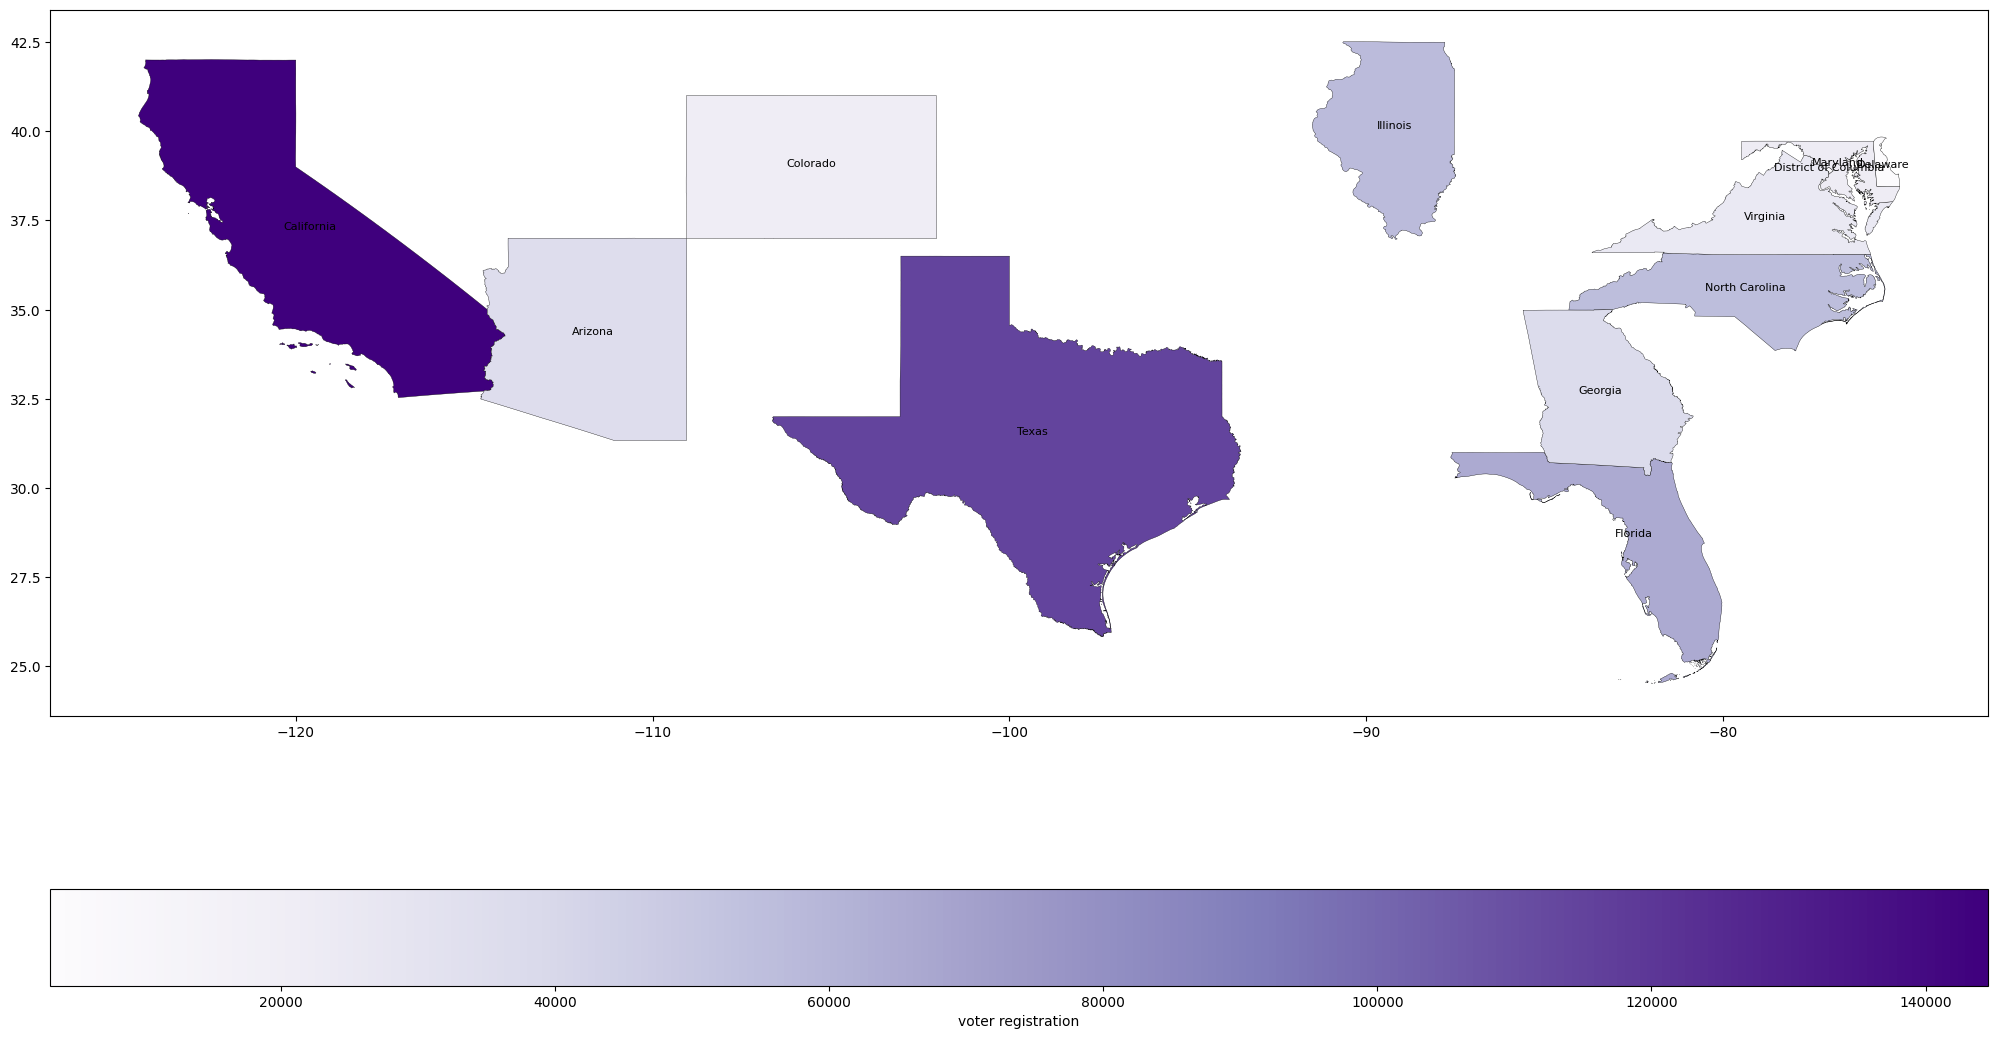

In [52]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]


fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
data.plot(column="registered_voters",ax=ax, legend=True, edgecolor="black", linewidth=.25,cmap="Purples",
            legend_kwds={"label": "voter registration",
            "orientation": "horizontal"})

data.apply(lambda x: ax.annotate(text=x.NAME,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=8),axis=1)

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.




---


Analysis and visualizations in this notebook hold value by assessing larger voter registration/participation trends in these states. For instance, there was a common trend of February being the highest month for voter registration. While a simple analysis like this can show interesting trends, a more robust analysis could be done with improvements to the data set. Additional information like state population would help normalize the data so that states like California and Texas don’t get over-represented because of their population. The data set also ends right amid COVID-19, so further studies would be helpful to see if COVID-19 policies have long-lasting effects on registration efforts.
